In [1]:
from annoy import AnnoyIndex

In [2]:
import sys
sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.io
import sklearn
import os

In [3]:
from oyla.mvc.utils import *

In [4]:
dir_path='/Users/rsingh/Oyla Dropbox/Oyla/02 Technical/10 Data/44x33/02_Jan_data_January_02_17_04_03/'

In [5]:
input_data_folder_name =  dir_path
csv_file = input_data_folder_name+'/parameters.csv'
parameters = read_csv_parameters(csv_file)

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [6]:
ambiguity_distance, range_max, range_min, saturation_flag, adc_flag, mod_freq, ampl_min,reflectivity_thresh = some_common_utility(parameters,0)

In [8]:
filter_params = {}
filter_parameters = {}
filter_parameters['filter_cmd'] = {}
filter_parameters = read_csv_parameters("/Users/rsingh/Oyla/Work/our_python_dev/oyla/mvc/filter_params.csv")
for k in filter_parameters['filter_cmd'].keys():
        #print(parameters['filter_cmd'][k][self.epoch_number])
        try:
                filter_params[k] = filter_parameters['filter_cmd'][k][0]
                #parameters['filter_cmd'][k][0] = filter_parameters['filter_cmd'][k][0]
        except ValueError:
                pass
#print(filter_params)

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [9]:
filter_params['median_filter'] = 1
filter_params['median_filter_iterations'] = 3
#filter_params['bilateral_filter'] = 1
#filter_params['bilateral_filter_std_range'] = 0.5*2
#filter_params['bilateral_filter_std_space'] = filter_params['bilateral_filter_std_range']
#filter_params['edge_detection'] = 1
#filter_params['edge_detection_thresholds'] = 1

In [11]:
index = np.random.randint(100)
#index = 234

# rgb = scipy.io.loadmat(dir_path+'/data_1_'+str(index)+'.mat')

# rgb = rgb['data'][0][4]

# rgb = rgb_depth_view_matching(rgb)

# dist = np.fromfile(dir_path+'/imageDistance_1_'+str(index)+'.bin',np.uint16())
# ampl = np.fromfile(dir_path+'/imageDistance_1_'+str(index)+'_ampl.bin',np.uint16())

#dist = dist.reshape(120,320)
#ampl = ampl.reshape(120,320)
if os.path.exists(dir_path+'/imageDistance_1_'+str(index)+'.bin'):
    dist = np.fromfile(dir_path+'/imageDistance_1_'+str(index)+'.bin',np.uint16())
    ampl = np.fromfile(dir_path+'/imageDistance_1_'+str(index)+'_ampl.bin',np.uint16())
    raw_phase = dist.reshape(120,320)
    raw_ampl = ampl.reshape(120,320)
else:
    raw_phase = rgb['data'][0][2][0][0][:,:,0].transpose()
    raw_ampl = rgb['data'][0][2][0][0][:,:,1].transpose()
raw_phase = dist.reshape(120,320)
raw_ampl = ampl.reshape(120,320)
filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                                             range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                                             filter_params = filter_params, ambiguity_distance = ambiguity_distance)

NameError: name 'os' is not defined

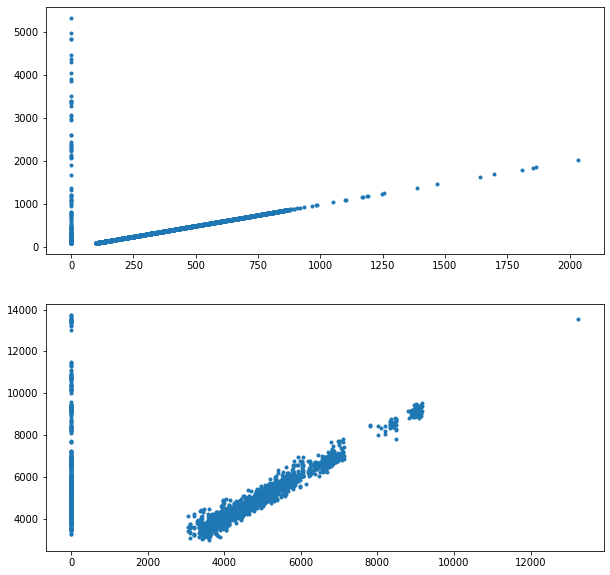

In [11]:
f, axs = plt.subplots(2,1,figsize=(10,10))

axs[0].plot(thresholded_ampl[raw_ampl<65000],raw_ampl[raw_ampl<65000],'.')
axs[1].plot(filtered_phase[raw_ampl<65000],raw_phase[raw_ampl<65000],'.')

(-0.5, 319.5, 119.5, -0.5)

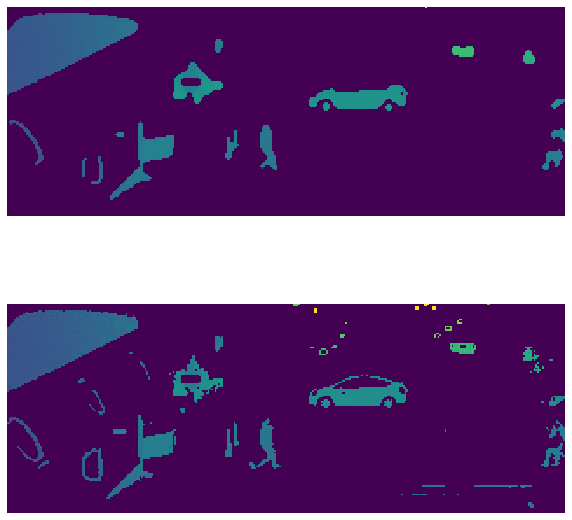

In [12]:
f, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].imshow((filtered_phase))
axs[0].axis('off')
axs[1].imshow(raw_phase)
axs[1].axis('off')

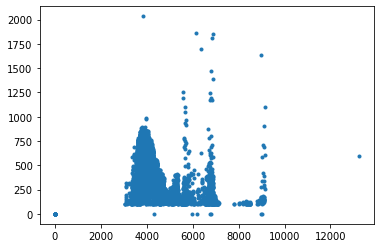

In [13]:
plt.plot(filtered_phase[raw_ampl<65000],thresholded_ampl[raw_ampl<65000],'.')

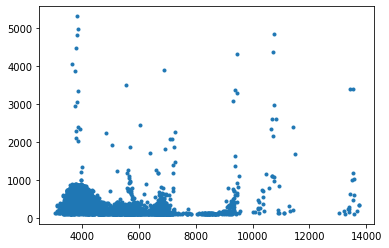

In [14]:
plt.plot(raw_phase[raw_ampl<65000],raw_ampl[raw_ampl<65000],'.')

In [15]:
annoy_on_threshold_ampl = AnnoyIndex(1,'euclidean')

In [402]:
count = 0
for a in thresholded_ampl.reshape(-1):
    if a>0:
        annoy_on_threshold_ampl.add_item(count,[a])
        count += 1

annoy_on_threshold_ampl.build(10)

True

In [403]:
#t.save('test.ann')

In [404]:
annoy_on_raw_ampl = AnnoyIndex(1,'euclidean')

In [405]:
#u.load('test.ann')
count = 0
for a in raw_ampl.reshape(-1):
    if a<65000:
        annoy_on_raw_ampl.add_item(count,[a])
        count += 1
annoy_on_raw_ampl.build(10)

True

In [406]:
annoy_on_threshold_ampl.get_n_items()

3097

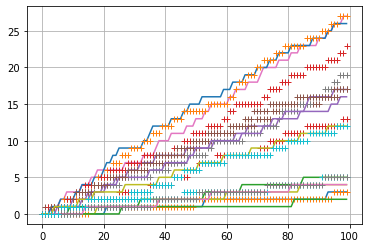

In [407]:
ind = np.random.choice(annoy_on_threshold_ampl.get_n_items(),10,replace=False)
for k in ind:
    #print(k)
    nn,d = annoy_on_raw_ampl.get_nns_by_item(k,100,include_distances=True)
    plt.plot(d)
    nn,d = annoy_on_threshold_ampl.get_nns_by_item(k,100,include_distances=True)
    plt.plot(d,'+')
plt.grid('on')
#nn,d = u.get_nns_by_item(0,100,include_distances=True)
#plt.plot(d)
#plt.grid('on')


In [484]:

adj_raw_ampl = np.zeros((annoy_on_raw_ampl.get_n_items(),annoy_on_raw_ampl.get_n_items()))

for i in range(annoy_on_raw_ampl.get_n_items()):
    nn,d = annoy_on_raw_ampl.get_nns_by_item(i,100,include_distances=True)
    adj_raw_ampl[i,np.asarray(nn)[np.asarray(d)<10]] = 1

In [492]:

adj_thresholded_ampl = np.zeros((annoy_on_threshold_ampl.get_n_items(),annoy_on_threshold_ampl.get_n_items()))

for i in range(annoy_on_threshold_ampl.get_n_items()):
    nn,d = annoy_on_threshold_ampl.get_nns_by_item(i,100,include_distances=True)
    adj_thresholded_ampl[i,np.asarray(nn)[np.asarray(d)<20]] = 1

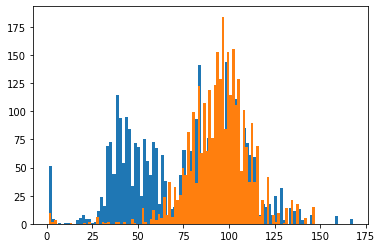

In [493]:
_=plt.hist(np.sum(adj_raw_ampl,axis=0),100)
_=plt.hist(np.sum(adj_thresholded_ampl,axis=0),100)
#plt.plot(np.sum(A,axis=1),'.')

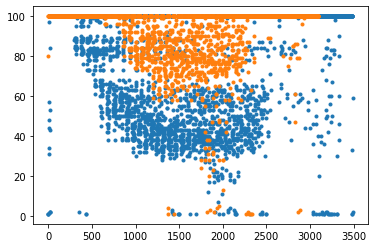

In [494]:
plt.plot(np.sum(adj_raw_ampl,axis=1),'.')
plt.plot(np.sum(adj_thresholded_ampl,axis=1),'.')

In [491]:
np.count_nonzero(np.sum(adj_thresholded_ampl,axis=1)<100)

12

In [413]:
np.count_nonzero(np.sum(adj_raw_ampl,axis=1)<100)

45

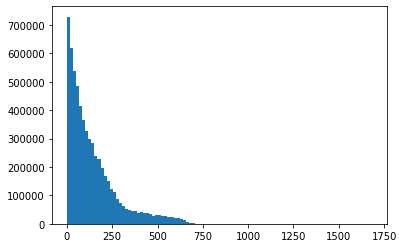

In [438]:
_=plt.hist(adj_thresholded_ampl[adj_thresholded_ampl>0],100)

In [440]:
np.mean(adj_thresholded_ampl[adj_thresholded_ampl>0])

142.8098097956898

In [454]:
np.min(thresholded_ampl[thresholded_ampl>0])

100

In [465]:
v = thresholded_ampl[thresholded_ampl>0].astype('float32')

In [476]:
D = np.zeros((3097,3097))

In [481]:
for i in range(3097):
    for j in range(i+1,3097):
        D[i,j] = np.abs(v[i]-v[j])
        

In [472]:
np.mean(D[D>0])

255.14379239396803

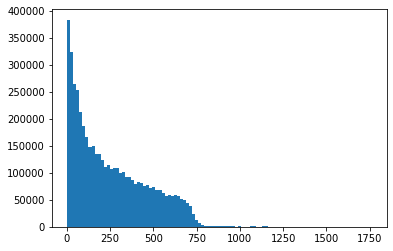

In [473]:
_=plt.hist(D[D>0],100)

In [480]:
v  = rgb[:,:,1].reshape(-1).astype('float32')

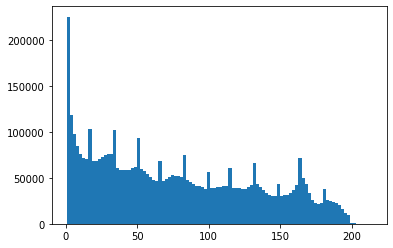

In [482]:
_=plt.hist(D[D>0],100)

In [483]:
np.mean(D)

38.406177236316374

In [497]:
help(cv2.flann_Index.getAlgorithm)

Help on method_descriptor:

getAlgorithm(...)
    getAlgorithm() -> retval
    .



In [16]:
r = np.random.rand(1000,6)

In [17]:
r.shape

(1000, 6)

In [19]:
a = cv2.flann_Index()

In [20]:
a.build(r,algorithm="autotuned", target_precision=0.9, log_level = "info")

TypeError: flann_Index.build() takes at most 3 arguments (4 given)

In [ ]:
a.